<a href="https://colab.research.google.com/github/irawan555/MachineLearningTasks/blob/main/9thWeekTasks/Irawan_Mardiansyah_1103210174_Regression_Case_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Irawan Mardiansyah

NIM : 1103210174

Kelas : TK4504

Lecture : 9

Dataset: housepricedata.csv

Model: Regression Case Neural Network

Dokumentasi GPT : https://chatgpt.com/share/1c7192c2-7c65-451d-aa4f-b883079582cc

In [24]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [27]:
# Assuming df is your DataFrame
# df = pd.read_csv('path_to_your_csv')

# Example data
data = {
    'LotArea': np.random.randint(5000, 15000, size=1000),
    'OverallQual': np.random.randint(1, 10, size=1000),
    'OverallCond': np.random.randint(1, 10, size=1000),
    'TotalBsmtSF': np.random.randint(500, 3000, size=1000),
    'FullBath': np.random.randint(1, 4, size=1000),
    'HalfBath': np.random.randint(0, 2, size=1000),
    'BedroomAbvGr': np.random.randint(1, 5, size=1000),
    'TotRmsAbvGrd': np.random.randint(4, 12, size=1000),
    'Fireplaces': np.random.randint(0, 3, size=1000),
    'GarageArea': np.random.randint(200, 1000, size=1000),
    'AboveMedianPrice': np.random.randint(0, 2, size=1000)
}
df = pd.DataFrame(data)

# Define feature columns and target column
features = df.drop(columns='AboveMedianPrice')
target = df['AboveMedianPrice']

# Normalize feature columns to range [0, 1]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split data into 70% training and 30% validation/testing
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Split the 30% validation/testing into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [28]:
# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                352       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
22/22 [==============================] - 1s 11ms/step - loss: 0.6937 - accuracy: 0.4943 - val_loss: 0.6968 - val_accuracy: 0.5133
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4929 - val_loss: 0.6978 - val_accuracy: 0.4800
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5129 - val_loss: 0.6985 - val_accuracy: 0.4800
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5171 - val_loss: 0.6992 - val_accuracy: 0.4800
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5243 - val_loss: 0.6994 - val_accuracy: 0.4867
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5257 - val_loss: 0.6996 - val_accuracy: 0.4733
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5271 - val_loss: 0.6999 - val_accuracy: 0.4600
Epoch 8/100


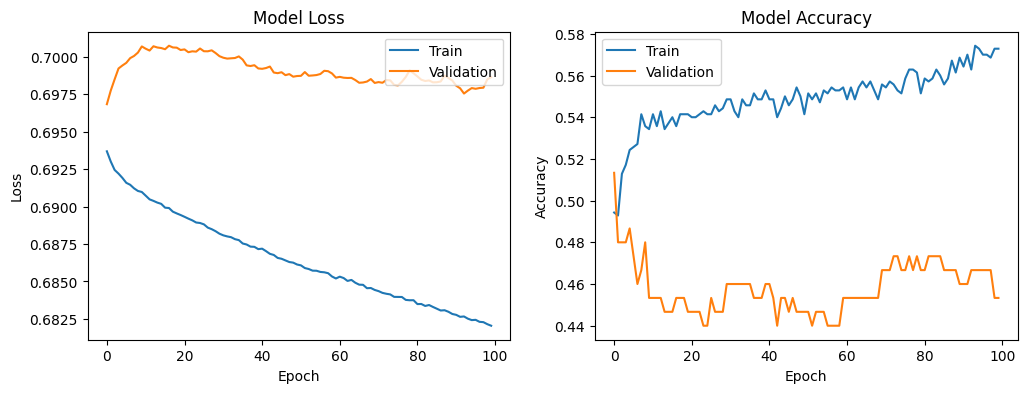

5/5 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.5467
Test Loss: 0.6879546642303467
Test Accuracy: 0.54666668176651


In [30]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')